Лабараторное получение
---

Рассмотрим реакцию

$ KNO_3 + H_2SO_4 → KHSO_4 + HNO_3 $
---

Составим математическую модель реакции

$ \frac{d[KNO_3]}{dt} = -k [KNO_3][H_2SO_4] $
---
$ \frac{d[H_2SO_4]}{dt} = -k [KNO_3][H_2SO_4] $
---
$ \frac{d[KHSO_4]}{dt} = k [KNO_3][H_2SO_4] $
---
$ \frac{d[HNO_3]}{dt} = k [KNO_3][H_2SO_4] $
---

Численно решим модель методом Рунге-Кутты 4-го порядка

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dCa(x, Ca, Cb, Cc, Cd):
    return - k * Ca * Cb

def dCb(x, Ca, Cb, Cc, Cd):
    return - k * Ca * Cb

def dCc(x, Ca, Cb, Cc, Cd):
    return k * Ca * Cb

def dCd(x, Ca, Cb, Cc, Cd):
    return k * Ca * Cb

In [3]:
dt = 0.01
t = np.arange(0, 300 + dt, dt)
n = len(t)

Ca = np.zeros(n)
Cb = np.zeros(n)
Cc = np.zeros(n)
Cd = np.zeros(n)

Ca[0] = 10
Cb[0] = 10
Cc[0] = 0
Cd[0] = 0

k = 0.0076

#Метод Рунге-Кутты 4-го порядка
for i in range(1, n):
    #Находим первые коэффициенты
    k11 = dCa(t[i-1], Ca[i-1], Cb[i-1], Cc[i-1], Cd[i-1])
    k12 = dCb(t[i-1], Ca[i-1], Cb[i-1], Cc[i-1], Cd[i-1])
    k13 = dCc(t[i-1], Ca[i-1], Cb[i-1], Cc[i-1], Cd[i-1])
    k14 = dCd(t[i-1], Ca[i-1], Cb[i-1], Cc[i-1], Cd[i-1])
    #Находим вторые коэффициенты
    k21 = dCa(t[i-1] + 0.5 * dt, Ca[i-1] + 0.5 * dt * k11, Cb[i-1] + 0.5 * dt * k12, Cc[i-1] + 0.5 * dt * k13, Cd[i-1] + 0.5 * dt * k14)
    k22 = dCb(t[i-1] + 0.5 * dt, Ca[i-1] + 0.5 * dt * k11, Cb[i-1] + 0.5 * dt * k12, Cc[i-1] + 0.5 * dt * k13, Cd[i-1] + 0.5 * dt * k14)
    k23 = dCc(t[i-1] + 0.5 * dt, Ca[i-1] + 0.5 * dt * k11, Cb[i-1] + 0.5 * dt * k12, Cc[i-1] + 0.5 * dt * k13, Cd[i-1] + 0.5 * dt * k14)
    k24 = dCd(t[i-1] + 0.5 * dt, Ca[i-1] + 0.5 * dt * k11, Cb[i-1] + 0.5 * dt * k12, Cc[i-1] + 0.5 * dt * k13, Cd[i-1] + 0.5 * dt * k14)
    #Находим третьи коэффициенты
    k31 = dCa(t[i-1] + 0.5 * dt, Ca[i-1] + 0.5 * dt * k21, Cb[i-1] + 0.5 * dt * k22, Cc[i-1] + 0.5 * dt * k23, Cd[i-1] + 0.5 * dt * k14)
    k32 = dCb(t[i-1] + 0.5 * dt, Ca[i-1] + 0.5 * dt * k21, Cb[i-1] + 0.5 * dt * k22, Cc[i-1] + 0.5 * dt * k23, Cd[i-1] + 0.5 * dt * k14)
    k33 = dCc(t[i-1] + 0.5 * dt, Ca[i-1] + 0.5 * dt * k21, Cb[i-1] + 0.5 * dt * k22, Cc[i-1] + 0.5 * dt * k23, Cd[i-1] + 0.5 * dt * k14)
    k34 = dCd(t[i-1] + 0.5 * dt, Ca[i-1] + 0.5 * dt * k21, Cb[i-1] + 0.5 * dt * k22, Cc[i-1] + 0.5 * dt * k23, Cd[i-1] + 0.5 * dt * k14)
    #Находим четвертые коэффициенты
    k41 = dCa(t[i-1] + dt, Ca[i-1] + dt * k31, Cb[i-1] + dt * k32, Cc[i-1] + dt * k33, Cd[i-1] + dt * k34)
    k42 = dCb(t[i-1] + dt, Ca[i-1] + dt * k31, Cb[i-1] + dt * k32, Cc[i-1] + dt * k33, Cd[i-1] + dt * k34)
    k43 = dCc(t[i-1] + dt, Ca[i-1] + dt * k31, Cb[i-1] + dt * k32, Cc[i-1] + dt * k33, Cd[i-1] + dt * k34)
    k44 = dCd(t[i-1] + dt, Ca[i-1] + dt * k31, Cb[i-1] + dt * k32, Cc[i-1] + dt * k33, Cd[i-1] + dt * k34)
    #получаем решение
    Ca[i] = Ca[i-1] + (dt/6) * (k11 + 2 * k21 + 2 * k31 + k41)
    Cb[i] = Cb[i-1] + (dt/6) * (k12 + 2 * k22 + 2 * k32 + k42)
    Cc[i] = Cc[i-1] + (dt/6) * (k13 + 2 * k23 + 2 * k33 + k43)
    Cd[i] = Cd[i-1] + (dt/6) * (k14 + 2 * k24 + 2 * k34 + k44)

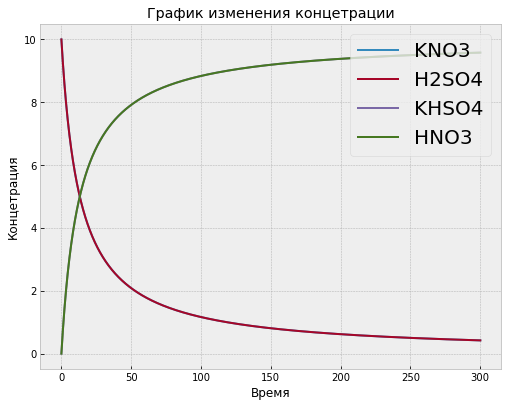

In [4]:
plt.style.use('bmh')
fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(t, Ca, label = 'KNO3')
ax.plot(t, Cb, label = 'H2SO4')
ax.plot(t, Cc, label = 'KHSO4')
ax.plot(t, Cd, label = 'HNO3')
plt.title("График изменения концетрации")
plt.xlabel("Время")
plt.ylabel("Концетрация")
plt.legend(loc='upper right', fontsize = 20)
plt.savefig("test.jpg")
plt.show()